<a href="https://colab.research.google.com/github/Mansi-pradhan/2510310_MansiPradhan/blob/main/2510310_MansiPradhan_Assignment3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Task**
---

**Life Expectancy**
Author: Mohamadreza Momeni
link to the dataset: https://www.kaggle.com/datasets/imtkaggleteam/life-expectancy?resource=download&select=3-+life-expectancy-at-different-ages.csv

The Life Expectancy dataset contains country‑level demographic and health statistics collected over multiple years. The goal of this task is to model and predict period life expectancy using socio‑economic and population attributes. This analysis supports Sustainable Development Goal 3 (Good Health and Well‑Being) by helping identify key factors influencing longevity.

Target Variable:

Life Expectancy at Birth (years)

Key Features:

Entity (Country)

Year

Life expectancy at different ages (Age 10, 25, 45, 65, 80)

Demographic trends over time


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3- life-expectancy-at-different-ages.csv")

In [3]:
df.head(5)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Period life expectancy - Sex: all - Age: 10,Period life expectancy - Sex: all - Age: 25,Period life expectancy - Sex: all - Age: 45,Period life expectancy - Sex: all - Age: 65,Period life expectancy - Sex: all - Age: 80
0,Afghanistan,AFG,1950,27.7275,49.1459,54.442200,63.422500,73.4901,83.7259
1,Afghanistan,AFG,1951,27.9634,49.2941,54.564400,63.500603,73.5289,83.7448
2,Afghanistan,AFG,1952,28.4456,49.5822,54.799800,63.647600,73.6018,83.7796
3,Afghanistan,AFG,1953,28.9304,49.8634,55.028603,63.788902,73.6706,83.8118
4,Afghanistan,AFG,1954,29.2258,49.9306,55.116500,63.848100,73.7041,83.8334


In [4]:
df.tail(5)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,Period life expectancy - Sex: all - Age: 10,Period life expectancy - Sex: all - Age: 25,Period life expectancy - Sex: all - Age: 45,Period life expectancy - Sex: all - Age: 65,Period life expectancy - Sex: all - Age: 80
20750,Zimbabwe,ZWE,2017,60.7095,64.6277,66.110596,71.014100,78.5895,86.8135
20751,Zimbabwe,ZWE,2018,61.4141,65.1821,66.604500,71.267200,78.6681,86.8399
20752,Zimbabwe,ZWE,2019,61.2925,65.0582,66.491600,71.203400,78.6739,86.8614
20753,Zimbabwe,ZWE,2020,61.1242,64.8006,66.086900,70.519104,78.0986,86.5717
20754,Zimbabwe,ZWE,2021,59.2531,62.8058,64.169700,68.801200,76.8507,85.7716


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               20755 non-null  object 
 1   Code                                                 19061 non-null  object 
 2   Year                                                 20755 non-null  int64  
 3   Period life expectancy at birth - Sex: all - Age: 0  20755 non-null  float64
 4   Period life expectancy - Sex: all - Age: 10          19922 non-null  float64
 5   Period life expectancy - Sex: all - Age: 25          19922 non-null  float64
 6   Period life expectancy - Sex: all - Age: 45          19922 non-null  float64
 7   Period life expectancy - Sex: all - Age: 65          19922 non-null  float64
 8   Period life expectancy - Sex: all - Age: 80          19922 non-null

In [6]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               20755 non-null  object 
 1   Code                                                 19061 non-null  object 
 2   Year                                                 20755 non-null  int64  
 3   Period life expectancy at birth - Sex: all - Age: 0  20755 non-null  float64
 4   Period life expectancy - Sex: all - Age: 10          19922 non-null  float64
 5   Period life expectancy - Sex: all - Age: 25          19922 non-null  float64
 6   Period life expectancy - Sex: all - Age: 45          19922 non-null  float64
 7   Period life expectancy - Sex: all - Age: 65          19922 non-null  float64
 8   Period life expectancy - Sex: all - Age: 80          19922 non-null

In [7]:
target = 'Period life expectancy at birth - Sex: all - Age: 0'

numeric_cols = [
    'Year',
    'Period life expectancy - Sex: all - Age: 10',
    'Period life expectancy - Sex: all - Age: 25',
    'Period life expectancy - Sex: all - Age: 45',
    'Period life expectancy - Sex: all - Age: 65',
    'Period life expectancy - Sex: all - Age: 80'
]

categorical_cols = ['Entity', 'Code']


In [8]:
print(df.describe())


               Year  Period life expectancy at birth - Sex: all - Age: 0  \
count  20755.000000                                       20755.000000     
mean    1975.730234                                          61.617992     
std       38.423230                                          12.917682     
min     1543.000000                                          11.995100     
25%     1961.000000                                          52.185850     
50%     1981.000000                                          64.060000     
75%     2001.000000                                          71.822250     
max     2021.000000                                          86.542400     

       Period life expectancy - Sex: all - Age: 10  \
count                                 19922.000000   
mean                                     68.815192   
std                                       7.075977   
min                                      22.114399   
25%                                      63.6

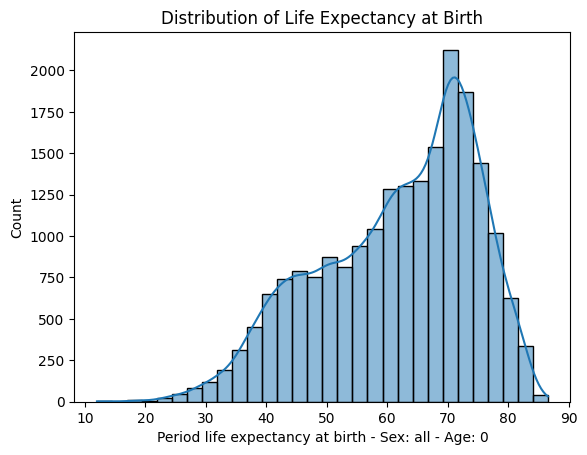

In [9]:
plt.figure()
sns.histplot(df[target], kde=True, bins=30)
plt.title("Distribution of Life Expectancy at Birth")
plt.show()


The above histogram displays the distribution of life expectancy at brith.

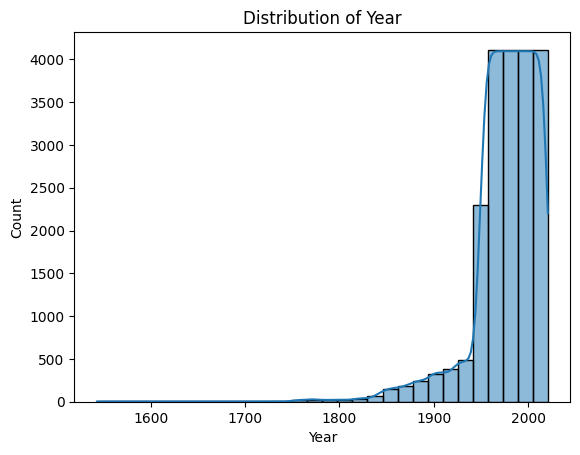

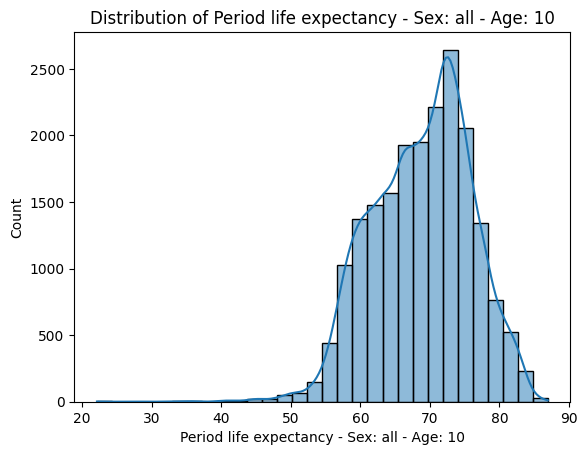

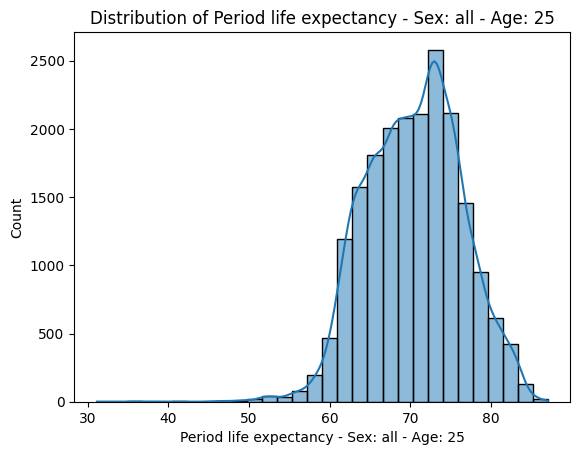

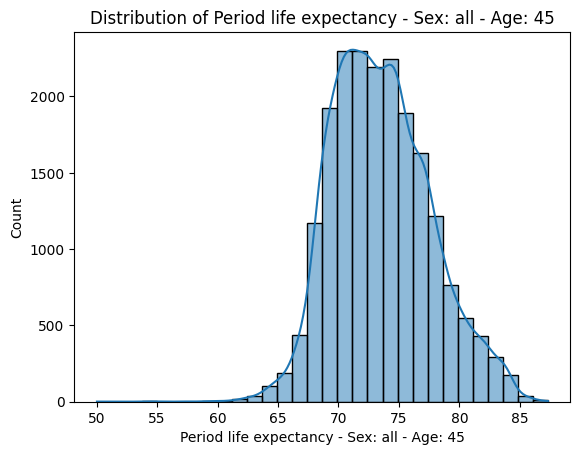

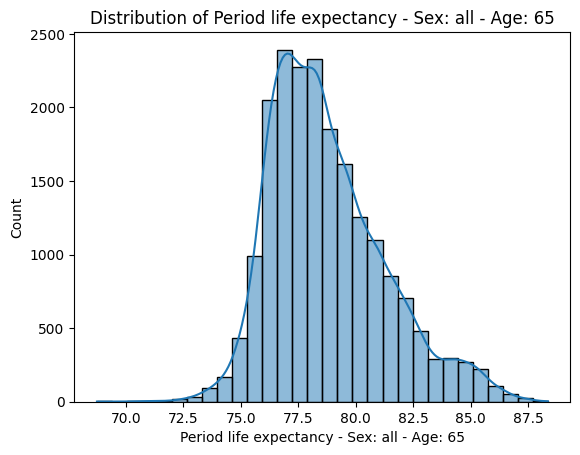

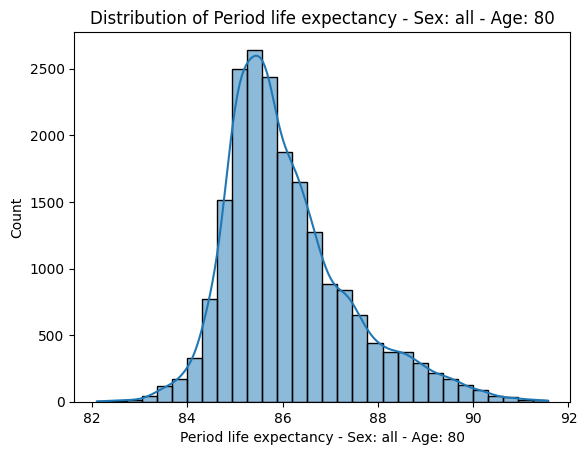

In [10]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


The histogram displays numeric columns of the dataset.

In [11]:
df['Entity'].value_counts().head(10)


,count
Entity,
Sweden,271
United Kingdom,240
France,206
Denmark,188
Iceland,184
Belgium,176
Norway,176
Netherlands,172
Finland,157


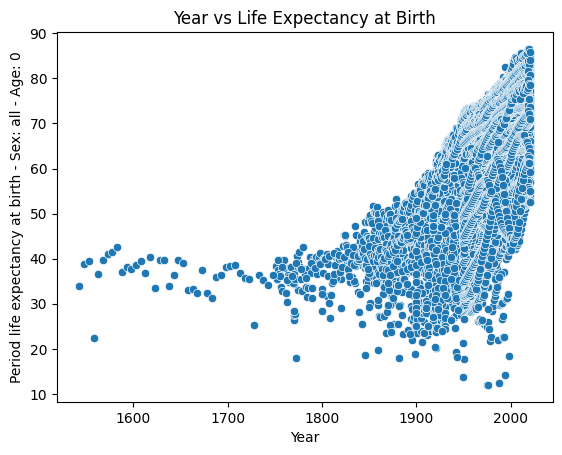

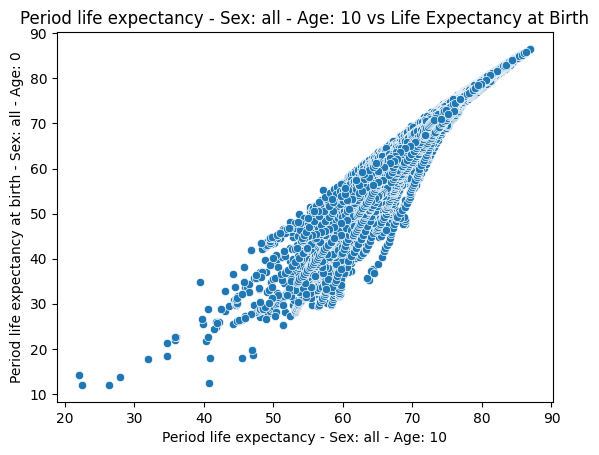

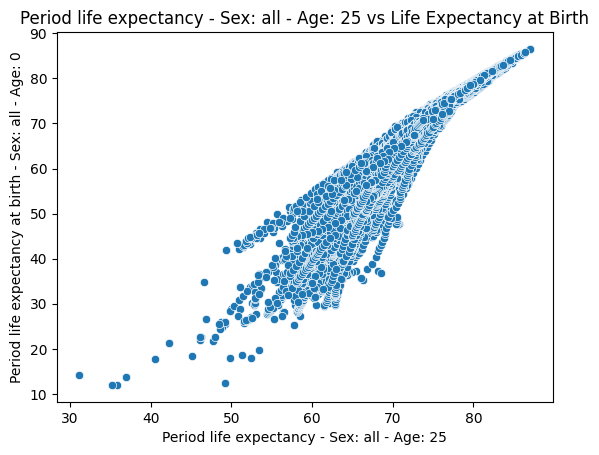

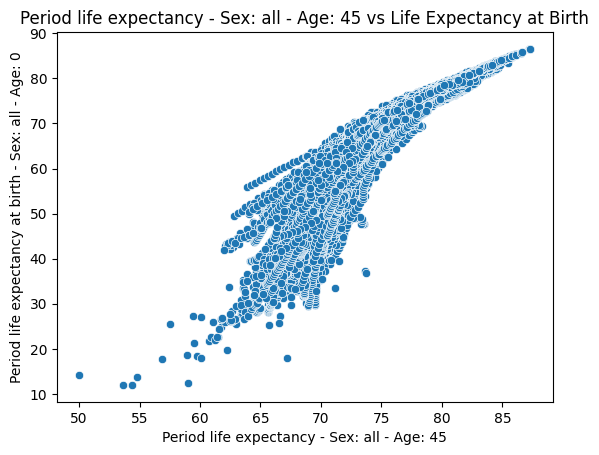

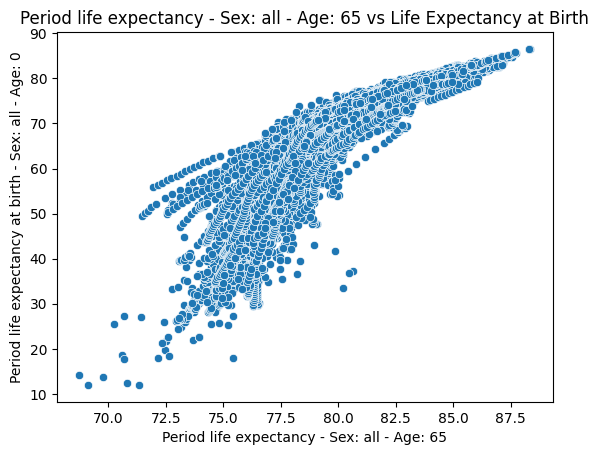

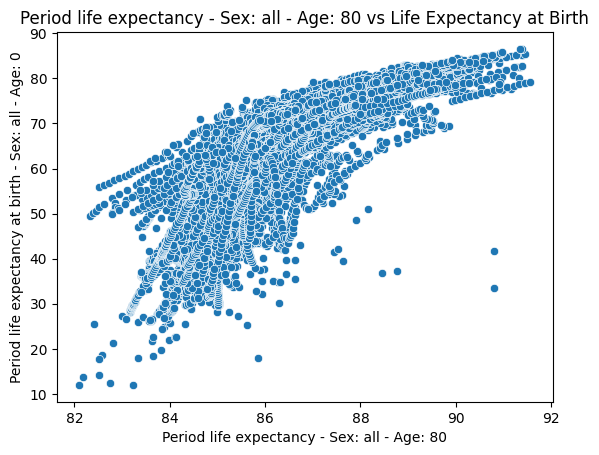

In [12]:
for col in numeric_cols:
    plt.figure()
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs Life Expectancy at Birth")
    plt.show()


The above scatterplot displays the numeric columns of the dataset with life expectancy at birth

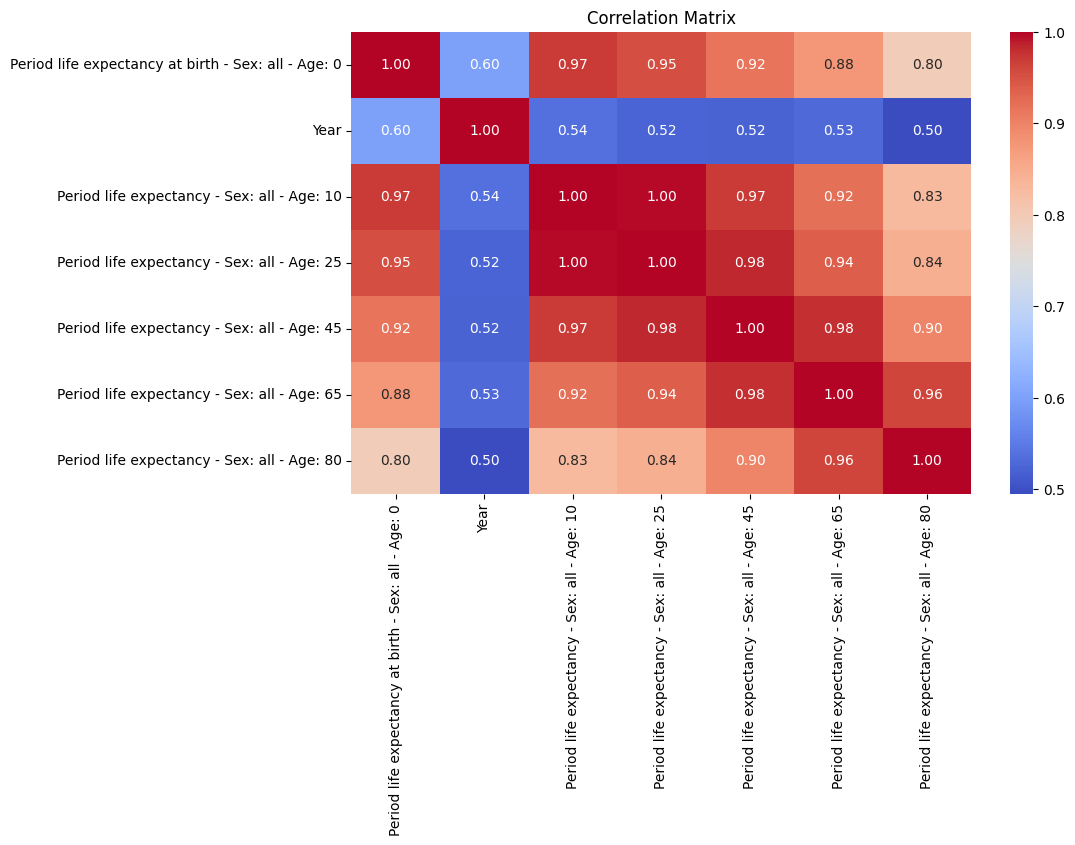

In [13]:
plt.figure(figsize=(10,6))
corr = df[[target] + numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


The above diagram displays the correlation matrics between features.

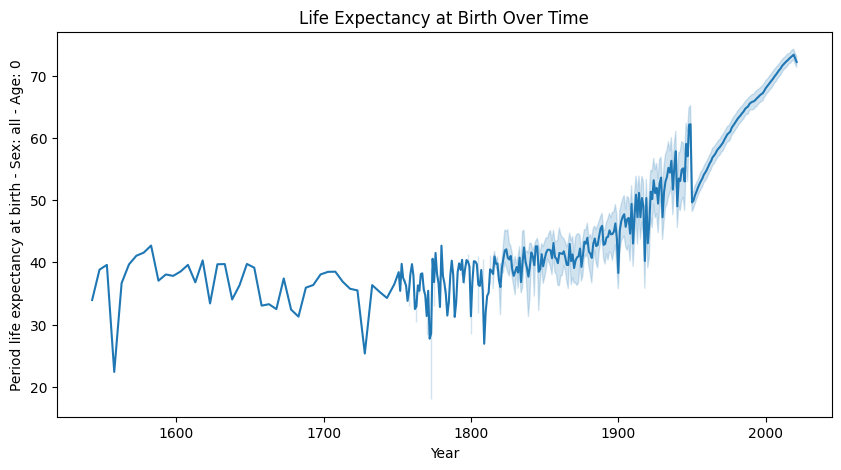

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y=target)
plt.title("Life Expectancy at Birth Over Time")
plt.show()


The above line plot displays life expectancy at birth over time.

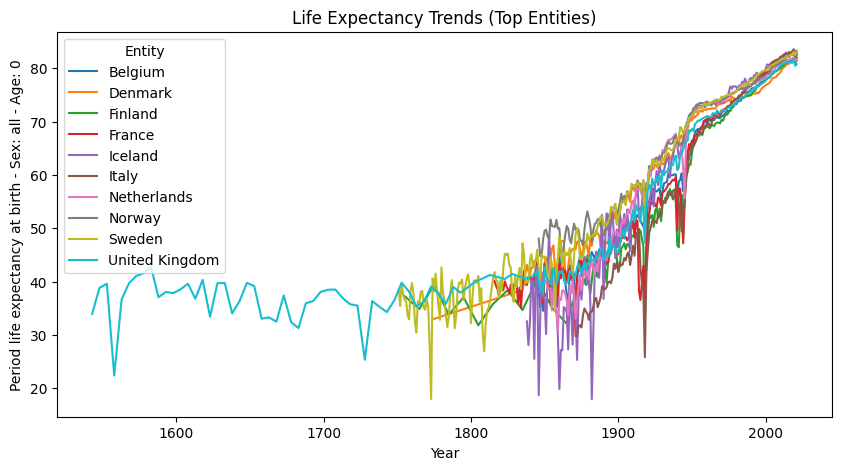

In [15]:
top_entities = df['Entity'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.lineplot(
    data=df[df['Entity'].isin(top_entities)],
    x='Year', y=target, hue='Entity'
)
plt.title("Life Expectancy Trends (Top Entities)")
plt.show()


The above lineplot displays the life expectancy trends of top countries.

In [16]:
target = 'Period life expectancy at birth - Sex: all - Age: 0'


In [17]:
X = df.drop(columns=[target])
y = df[target]


In [18]:
numeric_cols = [
    'Year',
    'Period life expectancy - Sex: all - Age: 10',
    'Period life expectancy - Sex: all - Age: 25',
    'Period life expectancy - Sex: all - Age: 45',
    'Period life expectancy - Sex: all - Age: 65',
    'Period life expectancy - Sex: all - Age: 80'
]

categorical_cols = ['Entity', 'Code']


In [19]:
print(X.isnull().sum())


Entity                                            0
Code                                           1694
Year                                              0
Period life expectancy - Sex: all - Age: 10     833
Period life expectancy - Sex: all - Age: 25     833
Period life expectancy - Sex: all - Age: 45     833
Period life expectancy - Sex: all - Age: 65     833
Period life expectancy - Sex: all - Age: 80     833
dtype: int64


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [21]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [22]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [25]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [26]:
X_train_processed.shape, X_test_processed.shape


((16604, 505), (4151, 505))

In [27]:
cat_features = preprocessor.named_transformers_['cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(categorical_cols)

all_features = numeric_cols + list(cat_features)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [29]:
lr = LinearRegression()


In [30]:
lr.fit(X_train_processed, y_train)


LinearRegression()

In [31]:
y_train_pred = lr.predict(X_train_processed)
y_test_pred = lr.predict(X_test_processed)


In [32]:
def regression_metrics(y_true, y_pred, label):
    print(f"\n{label} Set Evaluation")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))


In [33]:
regression_metrics(y_train, y_train_pred, "Training")



Training Set Evaluation
MAE : 1.9886685882981923
RMSE: 3.51219591406277
R²  : 0.9261914618987652


In [34]:
regression_metrics(y_test, y_test_pred, "Test")



Test Set Evaluation
MAE : 1.9833360058973357
RMSE: 3.51998997371155
R²  : 0.9252545976114999


In [35]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R² :", r2_score(y_test, y_test_pred))


Train R²: 0.9261914618987652
Test R² : 0.9252545976114999


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [37]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)


In [38]:
rf_reg.fit(X_train_processed, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [39]:
y_train_pred = rf_reg.predict(X_train_processed)
y_test_pred = rf_reg.predict(X_test_processed)


In [40]:
def regression_metrics(y_true, y_pred, label):
    print(f"\n{label} Set Evaluation")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

# Training performance
regression_metrics(y_train, y_train_pred, "Training")

# Test performance
regression_metrics(y_test, y_test_pred, "Test")



Training Set Evaluation
MAE : 0.30609716192182546
RMSE: 0.5606491362001318
R²  : 0.9981192483496366

Test Set Evaluation
MAE : 0.8039386021500843
RMSE: 1.4894103529845344
R²  : 0.9866177121257905


| Model                       | MAE      | RMSE     | R²        |
| --------------------------- | -------- | -------- | --------- |
| **Linear Regression**       | 1.98     | 3.52     | 0.925     |
| **Random Forest Regressor** | **0.80** | **1.49** | **0.987** |


Random Forest Regressor clearly outperforms Linear Regression across all metrics.

Much lower MAE and RMSE indicate more accurate and consistent predictions.

Higher R² (0.987) shows it explains almost all the variance in life expectancy.

This suggests that non‑linear relationships and feature interactions are important, which Random Forest captures better than Linear Regression.

In [41]:
import pandas as pd

rf_importance = pd.Series(
    rf_reg.feature_importances_,
    index=all_features
).sort_values(ascending=False)

rf_importance.head(15)


,0
Period life expectancy - Sex: all - Age: 10,0.923204
Year,0.029060
Period life expectancy - Sex: all - Age: 65,0.005466
Period life expectancy - Sex: all - Age: 45,0.005271
Period life expectancy - Sex: all - Age: 80,0.004615
Period life expectancy - Sex: all - Age: 25,0.004253
Code_LUX,0.001824
Entity_Luxembourg,0.001357
Code_USA,0.001136
Entity_United States,0.000958


In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [43]:
ridge = Ridge()

ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}


In [44]:
ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

ridge_grid.fit(X_train_processed, y_train)

best_ridge = ridge_grid.best_estimator_

print("Best Ridge alpha:", ridge_grid.best_params_)


Best Ridge alpha: {'alpha': 0.1}


In [45]:
y_test_pred_ridge = best_ridge.predict(X_test_processed)

print("Ridge Regression Performance")
print("MAE :", mean_absolute_error(y_test, y_test_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
print("R²  :", r2_score(y_test, y_test_pred_ridge))


Ridge Regression Performance
MAE : 1.9850649860637004
RMSE: 3.5237544474832525
R²  : 0.9250946383109666


In [46]:
from sklearn.ensemble import RandomForestRegressor


In [47]:
rf_reg = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [48]:
rf_grid = GridSearchCV(
    estimator=rf_reg,
    param_grid=rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

rf_grid.fit(X_train_processed, y_train)

best_rf_reg = rf_grid.best_estimator_

print("Best Random Forest Params:", rf_grid.best_params_)


Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [49]:
y_test_pred_rf = best_rf_reg.predict(X_test_processed)

print("Random Forest Regression Performance")
print("MAE :", mean_absolute_error(y_test, y_test_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print("R²  :", r2_score(y_test, y_test_pred_rf))


Random Forest Regression Performance
MAE : 0.8078044780438451
RMSE: 1.4974408797055858
R²  : 0.9864730152164329


In [50]:
import pandas as pd
import numpy as np


In [51]:
ridge_coeffs = pd.Series(
    best_ridge.coef_,
    index=all_features
).abs().sort_values(ascending=False)

ridge_coeffs.head(10)


,0
Period life expectancy - Sex: all - Age: 10,19.118186
Period life expectancy - Sex: all - Age: 25,15.572249
Entity_Sweden,10.884298
Period life expectancy - Sex: all - Age: 45,8.274210
Entity_Scotland,7.437195
Entity_England and Wales,7.403320
Entity_Low-income countries,7.071680
Entity_Africa,6.961031
Entity_Least developed countries,6.904913
Entity_Land-locked Developing Countries (LLDC),6.338286


In [52]:
top_k = 10
selected_features_ridge = ridge_coeffs.head(top_k).index.tolist()

print("Selected features (Ridge):")
selected_features_ridge


Selected features (Ridge):


['Period life expectancy - Sex: all - Age: 10',
 'Period life expectancy - Sex: all - Age: 25',
 'Entity_Sweden',
 'Period life expectancy - Sex: all - Age: 45',
 'Entity_Scotland',
 'Entity_England and Wales',
 'Entity_Low-income countries',
 'Entity_Africa',
 'Entity_Least developed countries',
 'Entity_Land-locked Developing Countries (LLDC)']

In [53]:
X_train_ridge_fs = X_train_processed[:, [all_features.index(f) for f in selected_features_ridge]]
X_test_ridge_fs  = X_test_processed[:,  [all_features.index(f) for f in selected_features_ridge]]


In [54]:
best_ridge.fit(X_train_ridge_fs, y_train)
y_pred_ridge_fs = best_ridge.predict(X_test_ridge_fs)


In [55]:
rf_importance = pd.Series(
    best_rf_reg.feature_importances_,
    index=all_features
).sort_values(ascending=False)

rf_importance.head(10)


,0
Period life expectancy - Sex: all - Age: 10,0.922952
Year,0.029265
Period life expectancy - Sex: all - Age: 65,0.005656
Period life expectancy - Sex: all - Age: 45,0.005437
Period life expectancy - Sex: all - Age: 80,0.004578
Period life expectancy - Sex: all - Age: 25,0.004035
Code_LUX,0.001778
Entity_Luxembourg,0.001406
Code_USA,0.001198
Entity_United States,0.000881


In [56]:
top_k = 10
selected_features_rf = rf_importance.head(top_k).index.tolist()

print("Selected features (Random Forest):")
selected_features_rf


Selected features (Random Forest):


['Period life expectancy - Sex: all - Age: 10',
 'Year',
 'Period life expectancy - Sex: all - Age: 65',
 'Period life expectancy - Sex: all - Age: 45',
 'Period life expectancy - Sex: all - Age: 80',
 'Period life expectancy - Sex: all - Age: 25',
 'Code_LUX',
 'Entity_Luxembourg',
 'Code_USA',
 'Entity_United States']

| Model                       | Feature Selection Method                    | Type     | Justification                                                                                                                                                       |
| --------------------------- | ------------------------------------------- | -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Ridge Regression**        | Coefficient magnitude ranking               | Embedded | Ridge shrinks coefficients while retaining all features; ranking absolute coefficients identifies predictors with the strongest linear influence on life expectancy |
| **Random Forest Regressor** | Feature Importance (`feature_importances_`) | Embedded | Random Forest evaluates features based on their contribution to reducing prediction error, capturing non‑linear effects and interactions                            |


In [57]:
X_train_rf_fs = X_train_processed[:, [all_features.index(f) for f in selected_features_rf]]
X_test_rf_fs  = X_test_processed[:,  [all_features.index(f) for f in selected_features_rf]]


In [58]:
best_rf_reg.fit(X_train_rf_fs, y_train)
y_pred_rf_fs = best_rf_reg.predict(X_test_rf_fs)


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def eval_model(y_true, y_pred, name):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

eval_model(y_test, y_pred_ridge_fs, "Ridge (Feature Selected)")
eval_model(y_test, y_pred_rf_fs, "Random Forest (Feature Selected)")



Ridge (Feature Selected)
MAE : 2.7860806176365096
RMSE: 5.340860864497784
R²  : 0.8279224714687539

Random Forest (Feature Selected)
MAE : 1.1410824760995872
RMSE: 2.191149100481702
R²  : 0.9710368700319182


| Model                            | MAE      | RMSE     | R²        |
| -------------------------------- | -------- | -------- | --------- |
| **Ridge Regression (FS)**        | 2.79     | 5.34     | 0.828     |
| **Random Forest Regressor (FS)** | **1.14** | **2.19** | **0.971** |




In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [61]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)


In [62]:
mlp_reg.fit(X_train_processed, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [63]:
y_train_pred = mlp_reg.predict(X_train_processed)
y_test_pred = mlp_reg.predict(X_test_processed)


In [64]:
def evaluate_regression(y_true, y_pred, label):
    print(f"\n{label} Set Performance")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

evaluate_regression(y_train, y_train_pred, "Training")
evaluate_regression(y_test, y_test_pred, "Test")



Training Set Performance
MAE : 0.32716893575306805
MSE : 0.531155300140122
RMSE: 0.7288040203923974
R²  : 0.996821877329284

Test Set Performance
MAE : 0.3918276431056184
MSE : 0.9375815042980986
RMSE: 0.9682879242756767
R²  : 0.9943439835646526


In [65]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [66]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)


In [67]:
mlp_reg.fit(X_train_processed, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [68]:
y_train_pred = mlp_reg.predict(X_train_processed)
y_test_pred = mlp_reg.predict(X_test_processed)


In [69]:
def regression_metrics(y_true, y_pred, label):
    print(f"\n{label} Set Performance")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))

regression_metrics(y_train, y_train_pred, "Training")
regression_metrics(y_test, y_test_pred, "Test")



Training Set Performance
MAE : 0.32716893575306805
MSE : 0.531155300140122
RMSE: 0.7288040203923974
R²  : 0.996821877329284

Test Set Performance
MAE : 0.3918276431056184
MSE : 0.9375815042980986
RMSE: 0.9682879242756767
R²  : 0.9943439835646526


1. Model Performance
The Random Forest model achieved the best performance, with low error (MAE ≈ 1.14, RMSE ≈ 2.19) and a high R² (≈ 0.97), indicating strong predictive accuracy and excellent variance explanation. In contrast, Ridge Regression showed higher errors and a lower R², reflecting limitations in modeling complex relationships.

2. Impact of Methods
Cross‑validation improved model robustness by ensuring stable performance across folds and reducing overfitting. Feature selection helped simplify models and, particularly for Random Forest, retained the most informative predictors, leading to strong performance even with fewer features.

3. Insights and Future Directions
The results highlight that non‑linear models are better suited for complex, real‑world datasets like life expectancy. Future work could focus on richer feature engineering, incorporating external socio‑economic indicators, and testing advanced models such as gradient boosting or deep neural networks.

